In [1]:
# 1.导入需要的模块和库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

In [2]:
# 2.导入数据，探索数据
data = pd.read_csv('./datas/digit recognizor.csv')

X = data.iloc[:,1:]
y = data.iloc[:,0]

X.shape

(42000, 784)

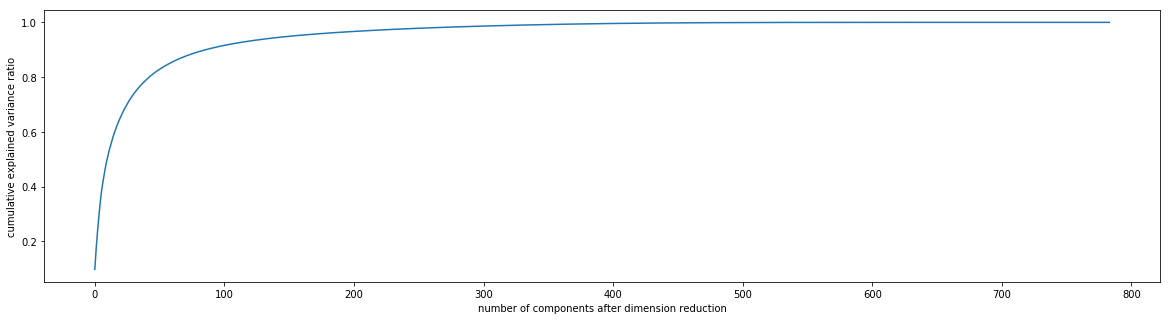

In [3]:
# 3.画累计方差贡献率曲线，找最佳降维后维度的范围
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

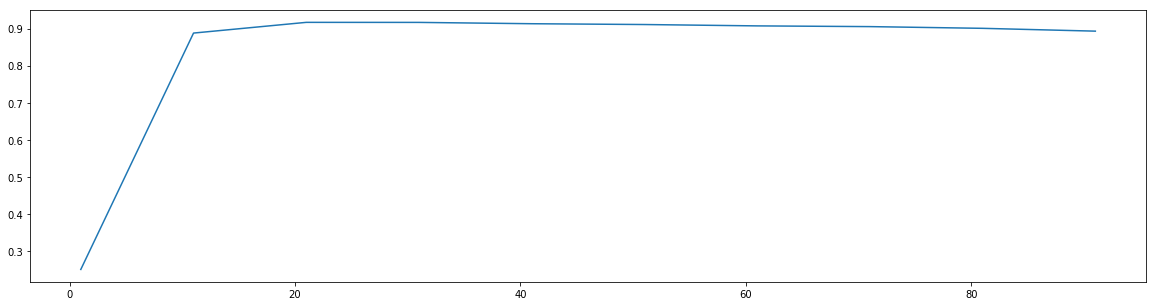

In [4]:
# 4.降维后维度的学习曲线，继续缩小最佳维度的范围
score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

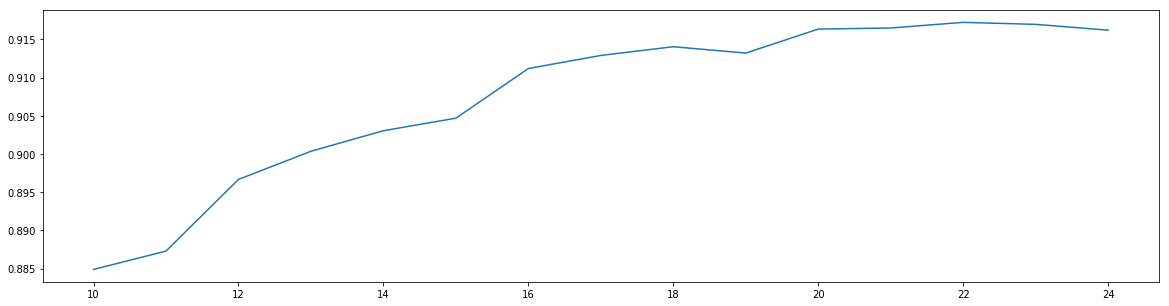

In [5]:
# 5.细化学习曲线，找出降维后的最佳维度
score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

In [6]:
# 6.导入找出的最佳维度进行降维，查看模型效果
X_dr = PCA(23).fit_transform(X)
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

0.946785974599959

In [7]:
# 7.特征数量已经不足原来的3%，更换模型
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),X_dr,y,cv=5).mean()

0.9699995642491164

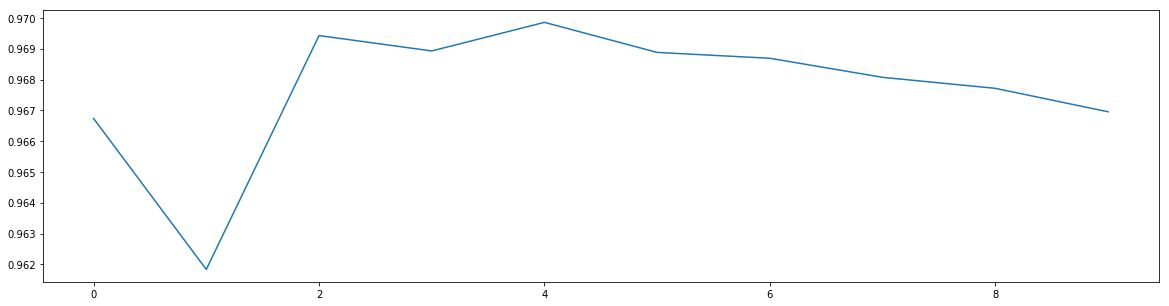

In [8]:
# 8.KNN的k值学习曲线
score = []
for i in range(10):
    X_dr = PCA(23).fit_transform(X)
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()